## Loading Packages

In [1]:
!pip install librosa soundfile numpy sklearn 
!pip install pyaudio
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=ee36da2dc8b060966ed8d8977d39c9b817c87d521ac9f2bc53b625d979a75001
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyaudio
Successfully built sklearn
Failed to build pyaudio
ERROR: Could not build wheels for pyaud

## Mounting Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
os.chdir('/content/drive/MyDrive/EmotionDetection')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/EmotionDetection'

## Loading Libraries

In [33]:
import librosa
import soundfile
import helpers
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [34]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
import warnings
warnings.filterwarnings("ignore")

## Extracting Features

In [36]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        if len(X.shape)>1:
            X=X.flatten()
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

### Mentioning Emotions

In [37]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#DataFlair - Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

## Loading Dataset

In [38]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob(r"/content/drive/MyDrive/EmotionDetection/speech-emotion-recognition-ravdess-data/Actor_*/*.wav"):
        print(file)
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [39]:
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

/content/drive/MyDrive/EmotionDetection/speech-emotion-recognition-ravdess-data/Actor_06/03-01-01-01-01-02-06.wav
/content/drive/MyDrive/EmotionDetection/speech-emotion-recognition-ravdess-data/Actor_06/03-01-02-02-02-01-06.wav
/content/drive/MyDrive/EmotionDetection/speech-emotion-recognition-ravdess-data/Actor_06/03-01-02-01-02-02-06.wav
/content/drive/MyDrive/EmotionDetection/speech-emotion-recognition-ravdess-data/Actor_06/03-01-01-01-02-02-06.wav
/content/drive/MyDrive/EmotionDetection/speech-emotion-recognition-ravdess-data/Actor_06/03-01-02-01-01-02-06.wav
/content/drive/MyDrive/EmotionDetection/speech-emotion-recognition-ravdess-data/Actor_06/03-01-02-01-02-01-06.wav
/content/drive/MyDrive/EmotionDetection/speech-emotion-recognition-ravdess-data/Actor_06/03-01-02-02-01-01-06.wav
/content/drive/MyDrive/EmotionDetection/speech-emotion-recognition-ravdess-data/Actor_06/03-01-02-02-01-02-06.wav
/content/drive/MyDrive/EmotionDetection/speech-emotion-recognition-ravdess-data/Actor_06

In [40]:
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [41]:
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [42]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [43]:
from helpers import MLPaccuracy
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [44]:
y_pred=model.predict(x_test)

In [45]:
y_pred

array(['disgust', 'disgust', 'happy', 'calm', 'disgust', 'calm',
       'fearful', 'disgust', 'fearful', 'calm', 'disgust', 'disgust',
       'happy', 'calm', 'fearful', 'disgust', 'calm', 'calm', 'fearful',
       'disgust', 'happy', 'disgust', 'disgust', 'calm', 'disgust',
       'happy', 'fearful', 'fearful', 'disgust', 'disgust', 'disgust',
       'disgust', 'fearful', 'disgust', 'disgust', 'disgust', 'fearful',
       'happy', 'happy', 'calm', 'calm', 'fearful', 'calm', 'disgust',
       'disgust', 'calm', 'calm', 'calm', 'fearful', 'happy', 'disgust',
       'disgust', 'disgust', 'disgust', 'calm', 'fearful', 'fearful',
       'disgust', 'calm', 'calm', 'calm', 'calm', 'disgust', 'calm',
       'disgust', 'happy', 'calm', 'disgust', 'fearful', 'calm',
       'disgust', 'fearful', 'fearful', 'disgust', 'fearful', 'calm',
       'fearful', 'calm', 'disgust', 'fearful', 'disgust', 'disgust',
       'happy', 'disgust', 'disgust', 'disgust', 'calm', 'disgust',
       'disgust', 'disgu

### Confusion Matrix

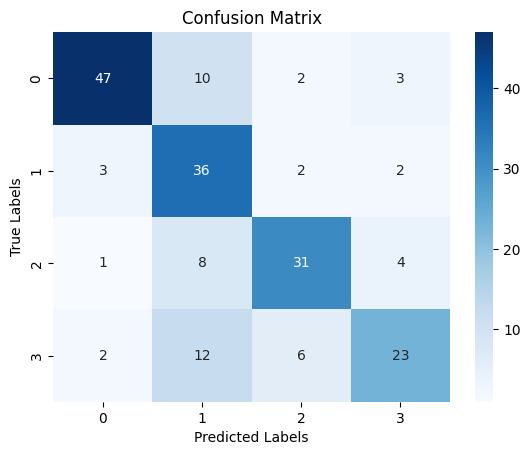

In [46]:
# y_pred and y_actual are the predicted and actual labels, respectively
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# set plot labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Classification Report

In [47]:
from sklearn.metrics import classification_report

# print precision, recall, and other classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        calm       0.89      0.76      0.82        62
     disgust       0.55      0.84      0.66        43
     fearful       0.76      0.70      0.73        44
       happy       0.72      0.53      0.61        43

    accuracy                           0.71       192
   macro avg       0.73      0.71      0.71       192
weighted avg       0.74      0.71      0.72       192



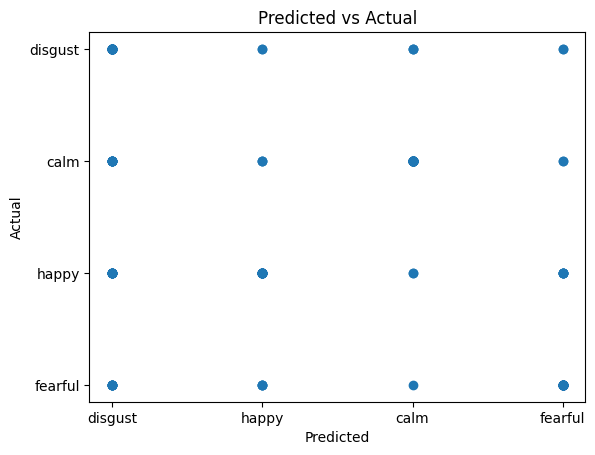

In [48]:
import matplotlib.pyplot as plt

# plot a scatter plot of predicted vs actual values
plt.scatter(y_pred, y_test)
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



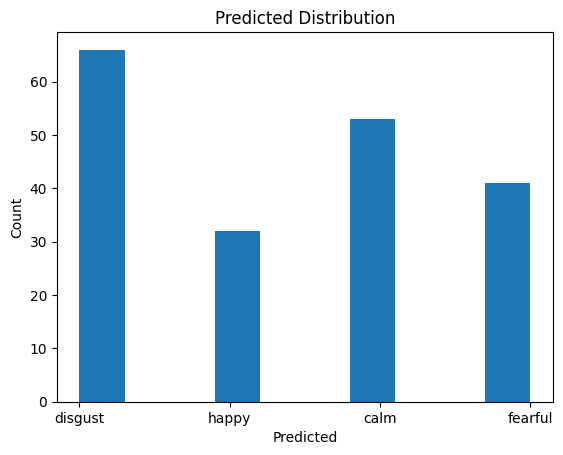

In [49]:
# plot a histogram of predicted values
plt.hist(y_pred, bins=10)
plt.title('Predicted Distribution')
plt.xlabel('Predicted')
plt.ylabel('Count')
plt.show()



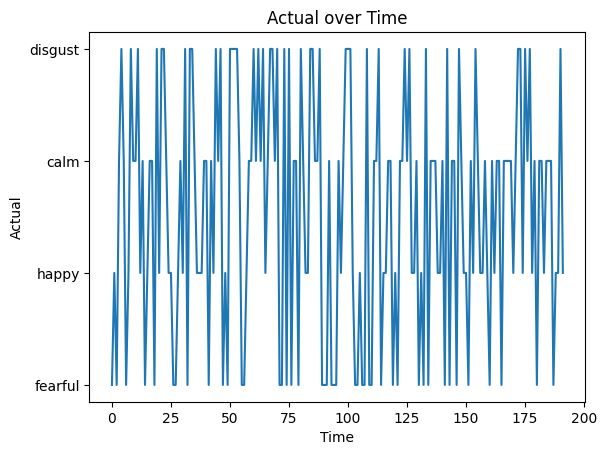

In [50]:
# plot a line plot of actual values over time
plt.plot(range(len(y_test)), y_test)
plt.title('Actual over Time')
plt.xlabel('Time')
plt.ylabel('Actual')
plt.show()


## Training SVM Model

In [51]:
#Import svm model
from sklearn import svm
from helpers import SVMAcc


#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

### Printing Accuracies

In [52]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",MLPaccuracy)

Accuracy: 0.7


In [53]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",SVMAcc)

Accuracy: 0.85


### Confusion Matrix

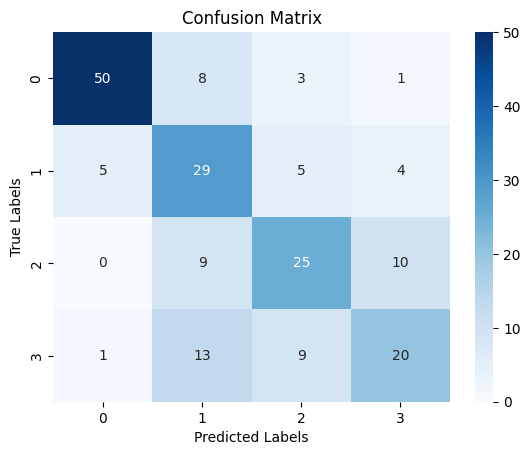

In [54]:
# y_pred and y_actual are the predicted and actual labels, respectively
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# set plot labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Cassification Report

In [55]:
# print precision, recall, and other classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        calm       0.89      0.81      0.85        62
     disgust       0.49      0.67      0.57        43
     fearful       0.60      0.57      0.58        44
       happy       0.57      0.47      0.51        43

    accuracy                           0.65       192
   macro avg       0.64      0.63      0.63       192
weighted avg       0.66      0.65      0.65       192



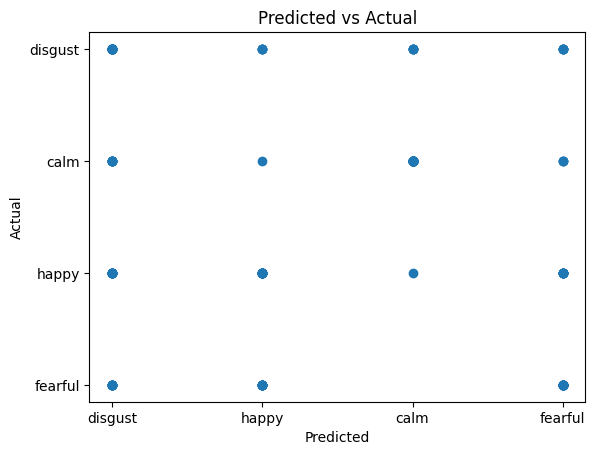

In [56]:
# plot a scatter plot of predicted vs actual values
plt.scatter(y_pred, y_test)
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

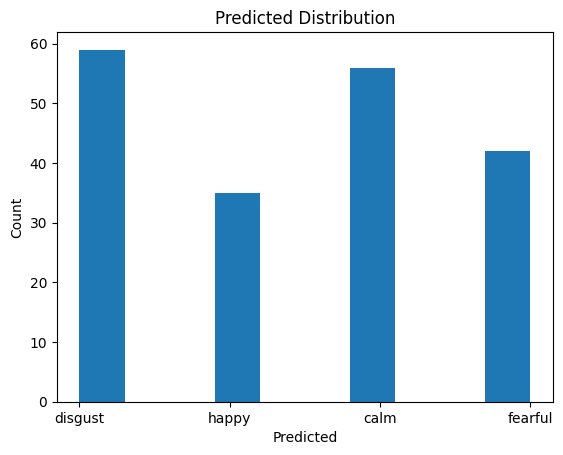

In [59]:
# plot a histogram of predicted values
plt.hist(y_pred, bins=10)
plt.title('Predicted Distribution')
plt.xlabel('Predicted')
plt.ylabel('Count')
plt.show()



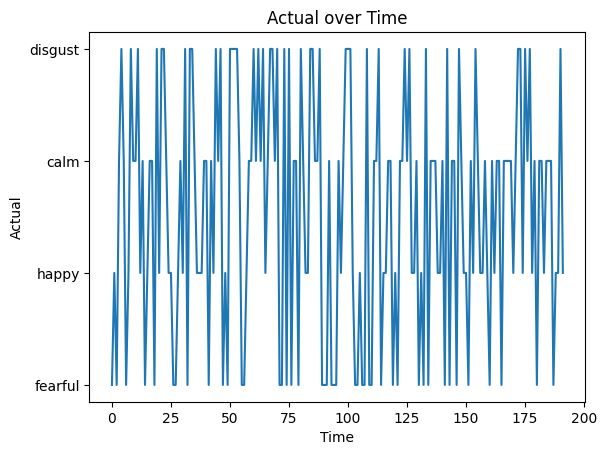

In [60]:
# plot a line plot of actual values over time
plt.plot(range(len(y_test)), y_test)
plt.title('Actual over Time')
plt.xlabel('Time')
plt.ylabel('Actual')
plt.show()


As we can see SVM has Higher Accuracy lets save SVM Model

In [61]:
import joblib
  
  
# Save the model as a pickle in a file
joblib.dump(clf, 'best_model.pkl')
  

['best_model.pkl']

## Testing with own Data

In [62]:
### Using MLP

In [63]:
# file = r"D:\Practice\Emotion Detection using sound\v2code\speech-emotion-recognition-ravdess-data\Actor_01\03-01-01-01-01-01-01.wav"
soundfilepath = r"sound samples/angry.wav"
feature=extract_feature(soundfilepath, mfcc=True, chroma=True, mel=True)

In [64]:
y_pred=model.predict([feature])

In [65]:
y_pred

array(['fearful'], dtype='<U7')

### Using SVM Model

In [66]:
import joblib
import numpy as np
 
# Load the model from the file
modeln = joblib.load('best_model.pkl')

In [67]:
from helpers import modeln
import pandas as pd
import numpy
import sys
sys.path.insert(0,"/content/drive/MyDrive/EmotionDetection")

In [68]:
from helpers import predict
import matplotlib.pyplot as plt

In [69]:
output = predict(modeln, soundfilepath)
output

[{'score': 0.22190281748771667, 'label': 'anger'},
 {'score': 0.20454905927181244, 'label': 'sadness'},
 {'score': 0.201227068901062, 'label': 'fear'},
 {'score': 0.19417054951190948, 'label': 'happiness'},
 {'score': 0.17815044522285461, 'label': 'disgust'}]

In [70]:
## Final Output
print(output[0]['label'])

anger
